In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import qriemannopt as qro

C:\Users\HYPERPC\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


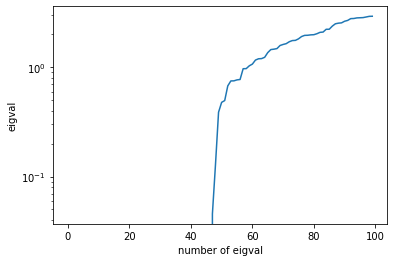

In [12]:
ham_dim = 100 # dimension of hamiltonian

# hamiltonian
Q = qro.manifold.real_to_complex(tf.random.normal((ham_dim, ham_dim, 2), dtype=tf.float64))
Q, _ = tf.linalg.qr(Q)
S = tf.random.uniform((ham_dim,), -3, 3)
#S = tf.exp(S)
S = tf.cast(S, dtype=tf.complex128)
H = tf.einsum('ik,k,jk->ij', Q, S, tf.math.conj(Q))

plt.plot(tf.linalg.eigvalsh(H))
plt.yscale('log')
plt.xlabel('number of eigval')
plt.ylabel('eigval')

# min of loss function
min_value = tf.cast(tf.linalg.eigvalsh(H)[0],
                   dtype=tf.float64)

# in dens matrix
rho = tf.eye(ham_dim, dtype=tf.complex128)
rho = rho / tf.linalg.trace(rho)
rho = qro.manifold.complex_to_real(rho)

# manifold of dens matrices
m = qro.manifold.DensM()

# optimizers
opts = {
        'GD':qro.optimizers.RSGD(m, 0.001),
        'GD_momentum':qro.optimizers.RSGD(m, 0.001, 0.9),
        'Adam':qro.optimizers.RAdam(m, 0.001),
        'Adam_with_ams':qro.optimizers.RAdam(m, 0.001, ams=True)
       }

In [17]:
list_of_losses = {}
# loop over optimizers
for key, opt in opts.items():
    # training loop
    losses = []
    rho_var = tf.Variable(rho)
    for _ in range(300):
        with tf.GradientTape() as tape:
            loss = tf.linalg.trace(qro.manifold.real_to_complex(rho_var) @ H)
            loss = tf.cast(loss, tf.float64)
            losses.append(loss - min_value)
        grad = tape.gradient(loss, rho_var)
        opt.apply_gradients(zip([grad], [rho_var]))
    list_of_losses[key] = losses

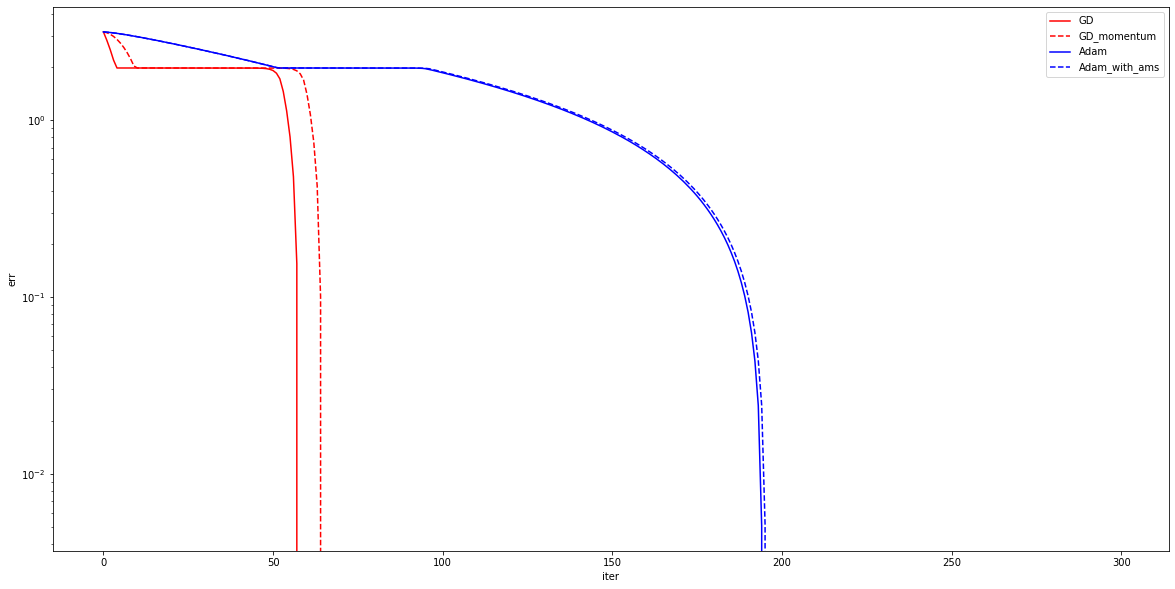

In [18]:
# learning curves
colors = ['r', 'r--', 'b', 'b--', 'k', 'k--', 'g', 'g--', 'r:', 'r-.', 'b:', 'b-.', 'k:', 'k-.', 'g:', 'g-.', 'purple']
plt.figure(figsize=(20, 10))
for i, key in enumerate(opts.keys()):
    plt.plot(list_of_losses[key], colors[i])
plt.legend(opts.keys())
plt.yscale('log')
plt.xlabel('iter')
plt.ylabel('err')
plt.savefig('Riemann_opt_first_test.pdf')

In [19]:
rho_c = qro.manifold.real_to_complex(rho_var)
grad_c = qro.manifold.real_to_complex(grad)
rgrad = m.egrad_to_rgrad(rho_c, grad_c)

In [20]:
tf.linalg.eigvalsh(rho_c)

<tf.Tensor: id=330235, shape=(100,), dtype=complex128, numpy=
array([-0.03342247+0.j, -0.03330817+0.j, -0.03269323+0.j, -0.03210499+0.j,
       -0.03196704+0.j, -0.03182966+0.j, -0.03127273+0.j, -0.03114672+0.j,
       -0.02951302+0.j, -0.02876684+0.j, -0.02736758+0.j, -0.02711546+0.j,
       -0.02658485+0.j, -0.02467848+0.j, -0.02228277+0.j, -0.02224379+0.j,
       -0.02024079+0.j, -0.02003733+0.j, -0.01910331+0.j, -0.01844536+0.j,
       -0.01833583+0.j, -0.01806979+0.j, -0.01799148+0.j, -0.01724266+0.j,
       -0.01580074+0.j, -0.014897  +0.j, -0.01477272+0.j, -0.01409758+0.j,
       -0.01301558+0.j, -0.01258616+0.j, -0.01202689+0.j, -0.01044884+0.j,
       -0.01015613+0.j, -0.00995807+0.j, -0.00853267+0.j, -0.00650148+0.j,
       -0.00597643+0.j, -0.00590076+0.j, -0.00538733+0.j, -0.0038884 +0.j,
       -0.00329217+0.j, -0.00234996+0.j, -0.00231766+0.j,  0.00080585+0.j,
        0.0009076 +0.j,  0.00115189+0.j,  0.00117458+0.j,  0.00235139+0.j,
        0.00520459+0.j,  0.0054945 +0.

In [141]:
vec = tf.linalg.eigh(rho_c)[1][:, -1]
r = tf.tensordot(vec, tf.math.conj(vec), axes=0)
tf.cast(tf.linalg.trace(r @ H), dtype=tf.float64)

<tf.Tensor: id=4092410, shape=(), dtype=float64, numpy=-2.916587591171265>

In [139]:
min_value

<tf.Tensor: id=3655978, shape=(), dtype=float64, numpy=-2.9165875911712633>

In [123]:
loss

<tf.Tensor: id=4019391, shape=(), dtype=float64, numpy=-2.8899480500127077>

In [118]:
tf.linalg.eigvalsh(rho_c)

<tf.Tensor: id=3777378, shape=(100,), dtype=complex128, numpy=
array([3.33349875e-05+0.j, 3.34521847e-05+0.j, 3.40176428e-05+0.j,
       3.53314074e-05+0.j, 3.56322012e-05+0.j, 3.61071646e-05+0.j,
       3.64222064e-05+0.j, 3.68979001e-05+0.j, 3.69852545e-05+0.j,
       3.78591152e-05+0.j, 3.78861448e-05+0.j, 3.84637211e-05+0.j,
       3.84715839e-05+0.j, 3.95503506e-05+0.j, 3.95753503e-05+0.j,
       3.95859544e-05+0.j, 3.99450486e-05+0.j, 4.03851983e-05+0.j,
       4.04182715e-05+0.j, 4.12346065e-05+0.j, 4.24865960e-05+0.j,
       4.34380901e-05+0.j, 4.36397156e-05+0.j, 4.44277208e-05+0.j,
       4.48265714e-05+0.j, 4.49236390e-05+0.j, 4.52413626e-05+0.j,
       4.55953304e-05+0.j, 4.64496024e-05+0.j, 4.70076554e-05+0.j,
       4.70957482e-05+0.j, 4.71471051e-05+0.j, 5.13032614e-05+0.j,
       5.14700812e-05+0.j, 5.32862833e-05+0.j, 5.45518837e-05+0.j,
       5.56391157e-05+0.j, 5.66269948e-05+0.j, 5.90882681e-05+0.j,
       5.93092011e-05+0.j, 5.96408430e-05+0.j, 5.99814948e-05+0.j,